In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/credit_scoring_eng.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [5]:
#Handling msiiing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
#check the percentage

df.isna().sum() / len(df)

,0
children,0.000000
days_employed,0.100999
dob_years,0.000000
education,0.000000
education_id,0.000000
family_status,0.000000
family_status_id,0.000000
gender,0.000000
income_type,0.000000
debt,0.000000


<Axes: >

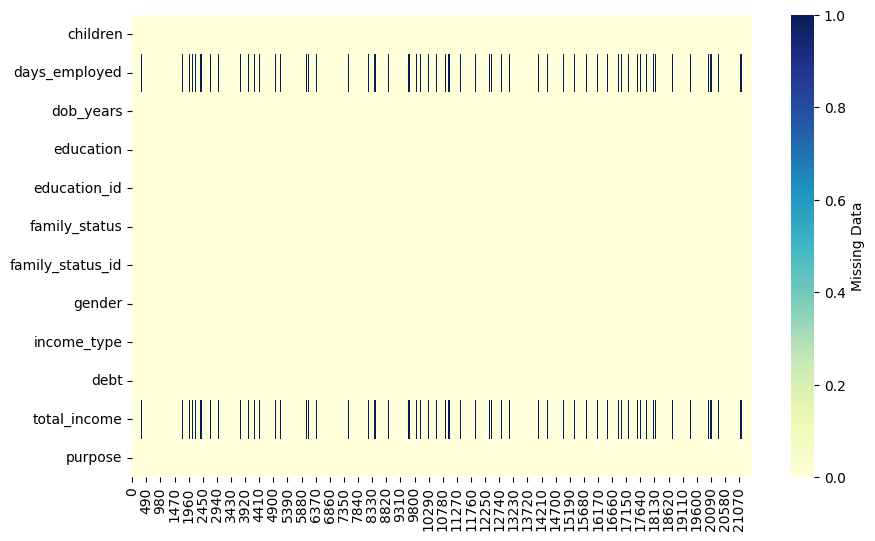

In [7]:
#Visualizing Missing Data using a seaborn heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'})

In [11]:
#function to fill in issing values using median
def data_imputation(data, column_grouping, column_selected):

  #Get unique category groups
  group = data[column_grouping].unique() # Add parentheses here to call the unique() method

  #Loop through each values in the group category
  for value in group:
    #get median
    median = data.loc[(data[column_grouping]==value) & ~(data[column_selected].isna()), column_selected].median()

    #change missing values
    data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

  return data

In [12]:
#apply the function to total_income column
df = data_imputation(data=df, column_grouping='age_category', column_selected='total_income')

KeyError: 'age_category'

In [13]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [14]:
df['total_income'].isna().sum()

2174

<Axes: ylabel='children'>

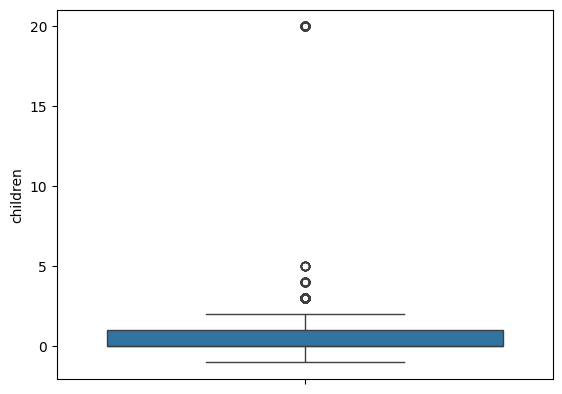

In [15]:
#Handling outliers

#check oulier in childre column
sns.boxplot(df['children'])

In [16]:
#check statistical data in children column
df['children'].describe()

,children
count,21525.000000
mean,0.538908
std,1.381587
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,20.000000


In [17]:
#replace the value 20 with the value 2
condition_children = df['children'] == 20
df['children'] =df['children'].mask(condition_children, 2)

In [18]:
#remove minus sign
df['children'] = abs(df['children'])

In [19]:
#verify the data
sorted(df['children'].unique())

[0, 1, 2, 3, 4, 5]

<Axes: ylabel='days_employed'>

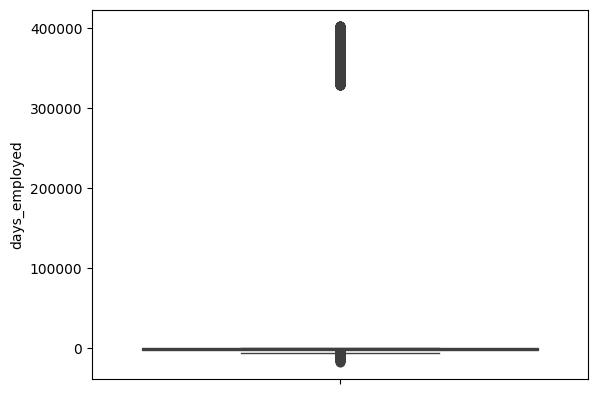

In [20]:
#check outliers in days_employed column
sns.boxplot(df['days_employed'])

In [21]:
# check percentage
len(df.loc[(df['days_employed'] < 0 ) | (df['days_employed'] > 200000)]) / len(df)

0.8990011614401858

In [22]:
#remove minus sign (-), assuming it was an input error
df['days_employed'] = abs(df['days_employed'])

In [23]:
#round
df['days_employed'] =round(df['days_employed'], 0)

In [24]:
# check data distribution
df['days_employed'].describe()


,days_employed
count,19351.000000
mean,66914.727973
std,139030.879631
min,24.000000
25%,927.000000
50%,2194.000000
75%,5538.000000
max,401755.000000


In [25]:
# Replace outlier with median
condition_de = (df['days_employed'] > 200000) & (df['days_employed'].notnull())
df['days_employed'] = df['days_employed'].mask(condition_de, df['days_employed'].median())

<Axes: ylabel='days_employed'>

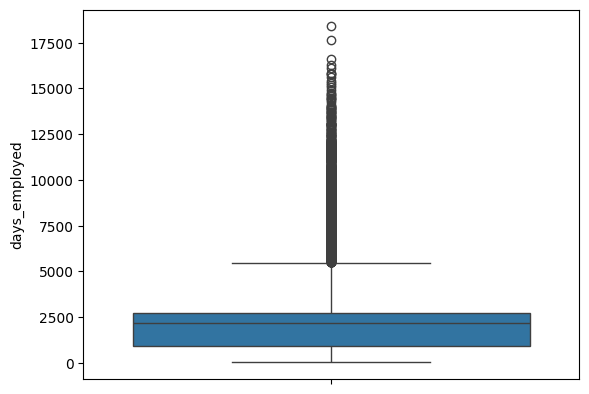

In [26]:
#verify the result
sns.boxplot(df['days_employed'])

In [27]:
#Handling Duplicates
#check duplicate
df.duplicated().sum()

54

In [28]:
#remove duplicate data and do reset index
df = df.drop_duplicates().reset_index(drop=True)

In [29]:
#verify the data
df.duplicated().sum()

0